In [ ]:
#Generate linux environment

In [ ]:
!curl -Lo conda_installer.py https://raw.githubusercontent.com/deepchem/deepchem/master/scripts/colab_install.py
import conda_installer
conda_installer.install()
!/root/miniconda/bin/conda info -e
!pip install --pre deepchem
import deepchem
deepchem.__version__

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  3490  100  3490    0     0  13960      0 --:--:-- --:--:-- --:--:-- 13960


add /root/miniconda/lib/python3.6/site-packages to PYTHONPATH
python version: 3.6.9
fetching installer from https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
done
installing miniconda to /root/miniconda
done
installing rdkit, openmm, pdbfixer
added omnia to channels
added conda-forge to channels
done
conda packages installation finished!


# conda environments:
#
base                  *  /root/miniconda

     |████████████████████████████████| 532kB 6.8MB/s 


'2.4.0-rc1.dev'

In [ ]:
# deepchem library which will use in developing deep learning model for virtual screening
import deepchem as dch

ChEMBL is a manually curated database of bioactive molecules with drug-like properties.

The Delaney(ESOL) dataset a regression dataset containing structures and water solubility data for 1128 compounds. The dataset is widely used to validate machine learning models on estimating solubility directly from molecular structures (as encoded in SMILES strings).

"Compound ID" - Name of the compound.

"smiles" - SMILES representation of the molecular structure.

"measured log solubility in mols per litre" - Log-scale water solubility of the compound, used as label.

https://deepchem.readthedocs.io/en/latest/moleculenet.html

In [ ]:
delaney_tasks, delaney_datasets, transformers = dch.molnet.load_delaney(create_dataset='GraphConv', split='index')                       
train_dataset, valid_dataset, test_dataset = delaney_datasets

'split' is deprecated.  Use 'splitter' instead.


In [ ]:
valid_dataset.get_shape

<bound method DiskDataset.get_shape of <DiskDataset X.shape: (113, 1024), y.shape: (113, 1), w.shape: (113, 1), ids: ['COC(C)(C)CCCC(C)CC=CC(C)=CC(=O)OC(C)C' 'CCOC(=O)CC'
 'CSc1nc(NC(C)C)nc(NC(C)C)n1' ... 'BrCCBr' 'CNC(=O)Oc1ccccc1C(C)C'
 'O=C1NCCN1c2ncc(s2)N(=O)=O'], task_names: ['measured log solubility in mols per litre']>>

In [ ]:
import numpy as np
# RDKit libraries for chemistry functions
from rdkit import Chem
# Drawing chemical structures
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
import pandas as pd
# Manipulating chemical data
from rdkit.Chem import PandasTools
# Calculating molecular descriptors
from rdkit.Chem import Descriptors
# Additional molecular properties
from rdkit.Chem import rdmolops
import seaborn as sns                   

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#active molecules 
active_molecules = pd.read_csv("data/actives_final.ism",header=None,sep=" ")
active_rows,active_cols = active_molecules.shape
active_molecules.columns = ["SMILES","ID","ChEMBL_ID"]
active_molecules["label"] = ["Active"]*active_rows
PandasTools.AddMoleculeColumnToFrame(active_molecules,"SMILES","Mol")

,SMILES,ID,ChEMBL_ID,label,Mol
0,Cc4cc(c1cc(O)ccc1Cl)cc5nnc(Nc3ccc(CCCN2CCCC2)c...,416908,CHEMBL250213,Active,
1,CN(CCN1CCCC1)S(=O)(=O)c5ccc(Nc4nnc3cc(c2cc(O)c...,416918,CHEMBL250019,Active,
2,CN5CCN(Cc4ccc(NC(=O)c3ccc(C)c(C#Cc1cnc2cccnn12...,649637,CHEMBL1171837,Active,
3,COc4cc(Nc2c(C#N)cnc3cc(\C=C\CCN1CCN(C)CC1)c(OC...,629071,CHEMBL1088240,Active,
4,COc5cc(Nc3c(C#N)cnc4cc(c2coc(CN1CCN(C)CC1)c2)c...,365326,CHEMBL219557,Active,

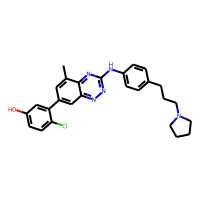
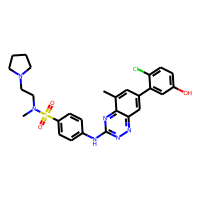
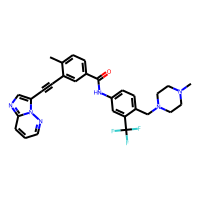
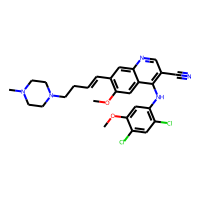
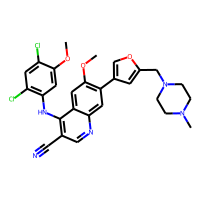

In [ ]:
active_molecules.head(5)
#ChEMBL is a manually curated database of bioactive molecules with drug-like properties. 
#It brings together chemical, bioactivity and genomic data to aid the translation of genomic information into effective 
#new drugs.
# molecular structure , Id , Chembl_d (ChEMBLdb is a manually curated chemical database Id), Active , Molecture Diagram 

Adding properties of molecules in each rows


In [ ]:

def add_property_columns_in_df(df_in):
    #molecular wt of the compund
    df_in["mw"] = [Descriptors.MolWt(mol) for mol in df_in.Mol]
    # Octanol-water partition coefficient 
    # a partition coefficient (P) or distribution coefficient (D) is the ratio of 
    # concentrations of a compound in a mixture of two immiscible solvents at equilibrium.
    # https://books.google.ie/books?id=yt7pBwAAQBAJ&pg=PA44&redir_esc=y#v=onepage&q&f=false
    df_in["logP"] = [Descriptors.MolLogP(mol) for mol in df_in.Mol]
    # formal charge on the molecule
    df_in["charge"] = [rdmolops.GetFormalCharge(mol) for mol in df_in.Mol]

In [ ]:
add_property_columns_in_df(active_molecules)

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,Cc4cc(c1cc(O)ccc1Cl)cc5nnc(Nc3ccc(CCCN2CCCC2)c...,416908,CHEMBL250213,Active,,474.008,6.13122,0
1,CN(CCN1CCCC1)S(=O)(=O)c5ccc(Nc4nnc3cc(c2cc(O)c...,416918,CHEMBL250019,Active,,553.088,4.81912,0
2,CN5CCN(Cc4ccc(NC(=O)c3ccc(C)c(C#Cc1cnc2cccnn12...,649637,CHEMBL1171837,Active,,532.570,4.45602,0
3,COc4cc(Nc2c(C#N)cnc3cc(\C=C\CCN1CCN(C)CC1)c(OC...,629071,CHEMBL1088240,Active,,526.468,5.82478,0
4,COc5cc(Nc3c(C#N)cnc4cc(c2coc(CN1CCN(C)CC1)c2)c...,365326,CHEMBL219557,Active,,552.462,6.18148,0
...,...,...,...,...,...,...,...,...
95,Cc2ccc(C(=O)Nc1cc(C(F)(F)F)ccn1)cc2\C=C\n3cnc4...,563166,CHEMBL550281,Active,,424.386,4.42872,0
96,CC(C)COC(=O)Nc5ccc(c4cnc3c(c2ccc(N1CCN(C)CC1)c...,633172,CHEMBL1085511,Active,,499.619,4.60180,0
97,CCSc4nc(Nc1cccc(Cl)c1)c3cnn(CC(Cl)c2ccccc2)c3n4,402629,CHEMBL428029,Active,,444.391,6.31540,0
98,Cc5ccc(n1nc(C(C)(C)C)cc1NC(=O)Nc3ccc(OCCN2CCOC...,167995,CHEMBL103667,Active,,527.669,5.98642,0

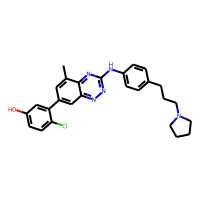
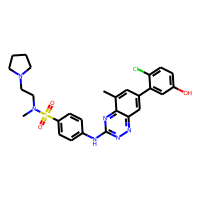
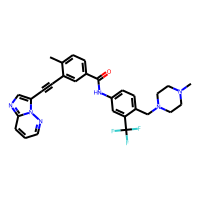
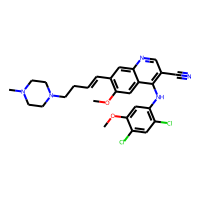
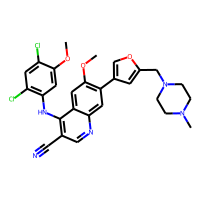
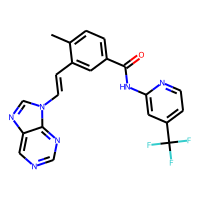
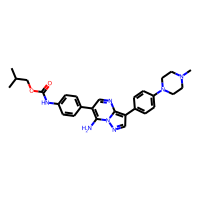
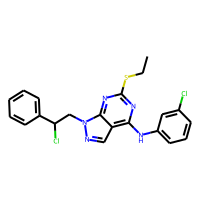
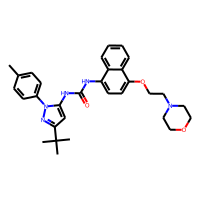
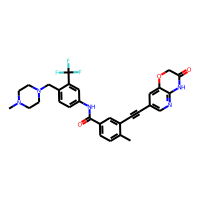

In [ ]:
active_molecules.head(100)

In [ ]:
#decoy molecules - nonactive molecules from http://dude.docking.org/
decoy_molecules = pd.read_csv("data/decoys_final.ism",header=None,sep=" ")
decoy_molecules.columns = ["SMILES","ID"]
decoy_rows, decoy_cols = decoy_molecules.shape
decoy_molecules["label"] = ["Decoy"]*decoy_rows
PandasTools.AddMoleculeColumnToFrame(decoy_molecules,"SMILES","Mol")
add_property_columns_in_df(decoy_molecules)

,SMILES,ID,label,Mol,mw,logP,charge
0,C[C@@H]1CCCC[C@]12C(=O)N(C(=O)N2)CC(=O)Nc3ccc(...,C02649438,Decoy,,358.398,1.22470,0
1,C=C1[C@H](C(=O)N(N1)c2nc3ccccc3s2)/C=N/C(CO)(C...,C01814196,Decoy,,362.411,0.06390,0
2,CCOC(=O)C1=C(OC(=C([C@@H]1c2ccc(cc2)OCC(=O)N)C...,C00808935,Decoy,,357.366,1.19548,0
3,CCOc1cc(ccc1O)[C@H]2c3c([nH]nc3O)C[C@@]([C@@H]...,C04908604,Decoy,,362.382,1.44780,0
4,CCCCn1c(=O)c(c([nH]c1=S)O)C2=NN[C@@H](C2)c3ccc...,C15834792,Decoy,,390.465,2.56449,0

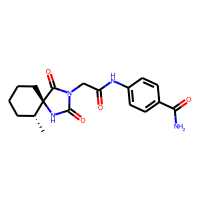
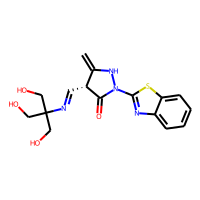
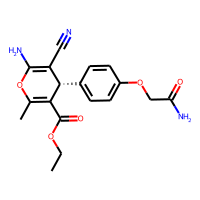
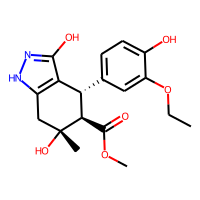
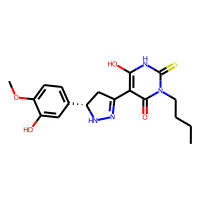

In [ ]:
decoy_molecules.head()

,SMILES,ID,label,Mol,mw,logP,charge
0,C[C@@H]1CCCC[C@]12C(=O)N(C(=O)N2)CC(=O)Nc3ccc(...,C02649438,Decoy,,358.398,1.22470,0
1,C=C1[C@H](C(=O)N(N1)c2nc3ccccc3s2)/C=N/C(CO)(C...,C01814196,Decoy,,362.411,0.06390,0
2,CCOC(=O)C1=C(OC(=C([C@@H]1c2ccc(cc2)OCC(=O)N)C...,C00808935,Decoy,,357.366,1.19548,0
3,CCOc1cc(ccc1O)[C@H]2c3c([nH]nc3O)C[C@@]([C@@H]...,C04908604,Decoy,,362.382,1.44780,0
4,CCCCn1c(=O)c(c([nH]c1=S)O)C2=NN[C@@H](C2)c3ccc...,C15834792,Decoy,,390.465,2.56449,0

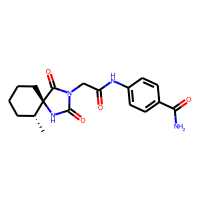
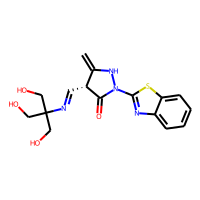
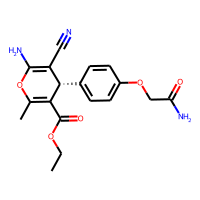
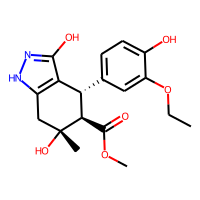
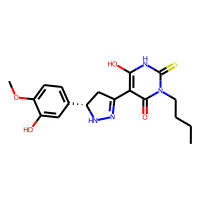

In [ ]:
decoy_molecules.head()

**Comparing active molecules data with decoy molecules in molecular weight.**

In [ ]:
new_dataframe = active_molecules.append(decoy_molecules)

**Comparing active molecules data with decoy molecules in molecular weight.**



In [ ]:
# tmp_df = active_molecules.append(decoy_molecules)

In [ ]:
# tmp_df.head()

,SMILES,ID,ChEMBL_ID,label,Mol,mw,logP,charge
0,Cc4cc(c1cc(O)ccc1Cl)cc5nnc(Nc3ccc(CCCN2CCCC2)c...,416908,CHEMBL250213,Active,,474.008,6.13122,0
1,CN(CCN1CCCC1)S(=O)(=O)c5ccc(Nc4nnc3cc(c2cc(O)c...,416918,CHEMBL250019,Active,,553.088,4.81912,0
2,CN5CCN(Cc4ccc(NC(=O)c3ccc(C)c(C#Cc1cnc2cccnn12...,649637,CHEMBL1171837,Active,,532.570,4.45602,0
3,COc4cc(Nc2c(C#N)cnc3cc(\C=C\CCN1CCN(C)CC1)c(OC...,629071,CHEMBL1088240,Active,,526.468,5.82478,0
4,COc5cc(Nc3c(C#N)cnc4cc(c2coc(CN1CCN(C)CC1)c2)c...,365326,CHEMBL219557,Active,,552.462,6.18148,0

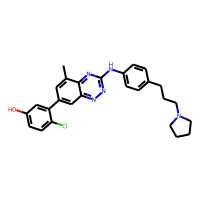
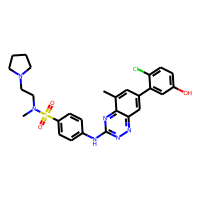
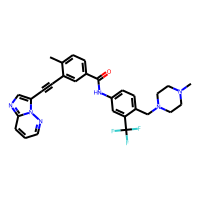
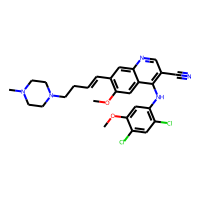
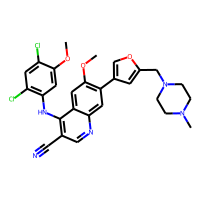

In [ ]:
new_dataframe.head()

**Comparing active molecules data with decoy molecules in molecular weight.**


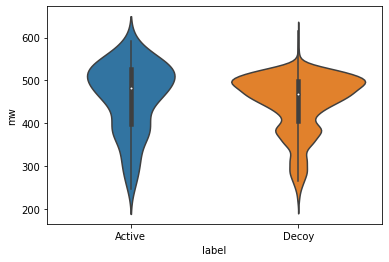

In [ ]:
sns.violinplot(new_dataframe["label"],new_dataframe["mw"])

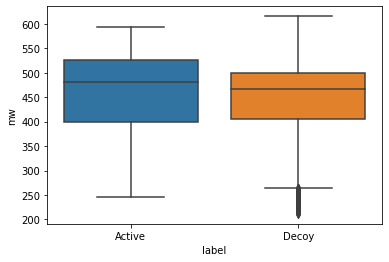

In [ ]:
sns.boxplot(new_dataframe["label"],new_dataframe["mw"])

**Comparing active molecules data with decoy molecules in logP.**


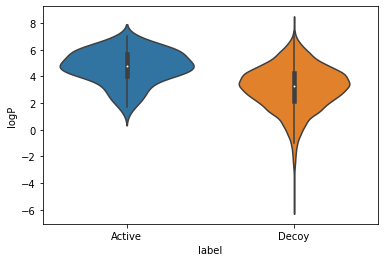

In [ ]:
sns.violinplot(new_dataframe["label"],new_dataframe["logP"])
# sns.boxplot(new_dataframe["label"],new_dataframe["logP"])

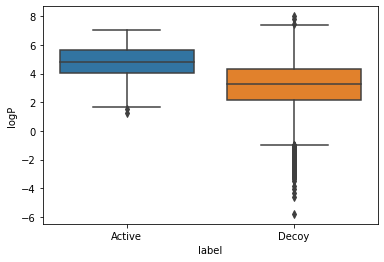

In [ ]:
sns.boxplot(new_dataframe["label"],new_dataframe["logP"])

The decoy set has more low molecular weight molecules, but the center of the distribution, shown as a box in the middle of each violin plot, is in a similar location in both plots.

**Comparing active molecules data with decoy molecules in Charges.**

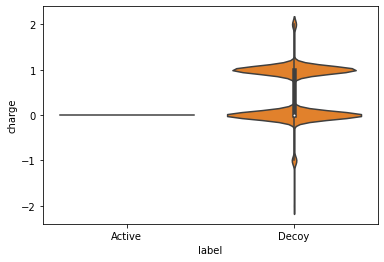

In [ ]:
sns.violinplot(new_dataframe["label"],new_dataframe["charge"])

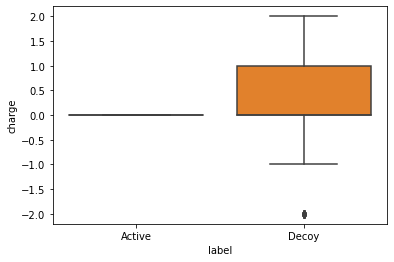

In [ ]:
sns.boxplot(new_dataframe["label"],new_dataframe["charge"])

In [ ]:
charged = decoy_molecules[decoy_molecules["charge"] != 0] # just removed netural charge molecule

**How much % of decoy molecule have charge**

In [ ]:
charged.shape[0]/decoy_molecules.shape[0]

0.4908837209302326

In [ ]:
new_decoy_molecules = decoy_molecules[["SMILES","ID","label"]].copy()

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from neutralization import MolNeutraliseCharges

# **Normalize decoy molecules**


In [ ]:
new_decoy_molecules["SMILES"] = [MolNeutraliseCharges(x)[0] for x in new_decoy_molecules["SMILES"]]

In [ ]:
# active molecule means : 1
active_molecules["is_active"] = [1] * active_molecules.shape[0]
# decoy molecule means : 0
new_decoy_molecules["is_active"] = [0] * new_decoy_molecules.shape[0]
combined_df = active_molecules.append(new_decoy_molecules)[["SMILES","ID","is_active"]]
combined_df.head()

,SMILES,ID,is_active
0,Cc4cc(c1cc(O)ccc1Cl)cc5nnc(Nc3ccc(CCCN2CCCC2)c...,416908,1
1,CN(CCN1CCCC1)S(=O)(=O)c5ccc(Nc4nnc3cc(c2cc(O)c...,416918,1
2,CN5CCN(Cc4ccc(NC(=O)c3ccc(C)c(C#Cc1cnc2cccnn12...,649637,1
3,COc4cc(Nc2c(C#N)cnc3cc(\C=C\CCN1CCN(C)CC1)c(OC...,629071,1
4,COc5cc(Nc3c(C#N)cnc4cc(c2coc(CN1CCN(C)CC1)c2)c...,365326,1


In [ ]:
combined_df.to_csv("data/combined_dataset.csv")

In [ ]:
import deepchem as dch # DeepChem libraries
from deepchem.models import GraphConvModel # Graph convolutions
import numpy as np # NumPy for numeric operations
import sys # Error handling
import pandas as pd # Data table manipulation
import seaborn as sns # Seaborn library for plotting
from rdkit.Chem import PandasTools # Chemical structures in Pandas

# **Create Graph convolution neural network**

In [ ]:
def generate_graph_convmodel():
  batch_size = 128
  model = GraphConvModel(1, batch_size=batch_size,
  mode='classification',
  model_dir="data/model_dir"
  #model_dir=""
  )
  return model

In [ ]:
dataset_file = "data/combined_dataset.csv"
tasks = ["is_active"]
featurizer = dch.feat.ConvMolFeaturizer()
loader = dch.data.CSVLoader(tasks=tasks, smiles_field="SMILES", featurizer=featurizer)
dataset = loader.featurize(dataset_file, shard_size=8192)

smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.


In [ ]:
splitter = dch.splits.RandomSplitter()

In [ ]:
metrics = [dch.metrics.Metric(dch.metrics.matthews_corrcoef)]

In [ ]:
data=pd.read_csv('data/combined_dataset.csv')

In [ ]:
data.head()

,Unnamed: 0,SMILES,ID,is_active
0,0,Cc4cc(c1cc(O)ccc1Cl)cc5nnc(Nc3ccc(CCCN2CCCC2)c...,416908,1
1,1,CN(CCN1CCCC1)S(=O)(=O)c5ccc(Nc4nnc3cc(c2cc(O)c...,416918,1
2,2,CN5CCN(Cc4ccc(NC(=O)c3ccc(C)c(C#Cc1cnc2cccnn12...,649637,1
3,3,COc4cc(Nc2c(C#N)cnc3cc(\C=C\CCN1CCN(C)CC1)c(OC...,629071,1
4,4,COc5cc(Nc3c(C#N)cnc4cc(c2coc(CN1CCN(C)CC1)c2)c...,365326,1


In [ ]:
data['is_active'].unique()

array([1, 0])

In [ ]:
data['is_active'].value_counts()

0    10750
1      182
Name: is_active, dtype: int64

# **Cross validation = 3**

In [ ]:
training_score_list = []
validation_score_list = []
transformers = []
model_list=[]
cv_folds = 3
score=0
model_final=0
for i in range(0,cv_folds):
    
    model = generate_graph_convmodel()
    train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)
    model.fit(train_dataset)
    model_list.append(model)
    train_scores = model.evaluate(train_dataset, metrics, transformers)
    # matthews_corrcoef correlation coefficient
    training_score_list.append(train_scores["matthews_corrcoef"])
    validation_scores = model.evaluate(valid_dataset, metrics, transformers)
    validation_score_list.append(validation_scores["matthews_corrcoef"])
    if(score < validation_scores["matthews_corrcoef"]):
      model_final=model
      score=validation_scores["matthews_corrcoef"]
      print(score)
print(training_score_list)
print(validation_score_list)

0.8478670891260287
0.9696920044163068
[0.9929640474033168, 1.0, 0.9889774085630726]
[0.8478670891260287, 0.9696920044163068, 0.9148036246330635]


In [ ]:
score

0.9696920044163068

# **Cross validation = 5**

In [ ]:
training_score_list = []
validation_score_list = []
transformers = []
model_list=[]
cv_folds = 5
score=0
model_final=0
for i in range(0,cv_folds):
    
    model = generate_graph_convmodel()
    train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)
    model.fit(train_dataset)
    model_list.append(model)
    train_scores = model.evaluate(train_dataset, metrics, transformers)
    training_score_list.append(train_scores["matthews_corrcoef"])
    validation_scores = model.evaluate(valid_dataset, metrics, transformers)
    validation_score_list.append(validation_scores["matthews_corrcoef"])
    if(score < validation_scores["matthews_corrcoef"]):
      model_final=model
      score=validation_scores["matthews_corrcoef"]
      print(score)
print(training_score_list)
print(validation_score_list)

0.9450257998981283
0.9631778860686327
[1.0, 0.9419333334710477, 0.9966686706764608, 1.0, 1.0]
[0.9450257998981283, 0.7961807347137532, 0.9631778860686327, 0.783876317494506, 0.8802808924390242]


In [ ]:
score

0.9631778860686327

# **Cross validation = 10**

In [ ]:
training_score_list = []
validation_score_list = []
transformers = []
model_list=[]
cv_folds = 10
score=0
model_final=0
for i in range(0,cv_folds):
    
    model = generate_graph_convmodel()
    train_dataset, valid_dataset, test_dataset = splitter.train_valid_test_split(dataset)
    model.fit(train_dataset)
    model_list.append(model)
    train_scores = model.evaluate(train_dataset, metrics, transformers)
    training_score_list.append(train_scores["matthews_corrcoef"])
    validation_scores = model.evaluate(valid_dataset, metrics, transformers)
    validation_score_list.append(validation_scores["matthews_corrcoef"])
    if(score < validation_scores["matthews_corrcoef"]):
      model_final=model
      score=validation_scores["matthews_corrcoef"]
      print(score)
print(training_score_list)
print(validation_score_list)

0.8586348007330405
0.9603244310543245
0.9696920044163068
[1.0, 0.9904663569351807, 0.9965579375920338, 0.9819737005487377, 0.9964878245903095, 0.9500736835629192, 1.0, 1.0, 0.971764855114841, 0.9002782885269016]
[0.8586348007330405, 0.9603244310543245, 0.9384646624848106, 0.9696920044163068, 0.9249632554429669, 0.7620023862081161, 0.9081287283459639, 0.87285373250289, 0.9001350207360869, 0.6701386077510155]


In [ ]:
score

0.9696920044163068

# **Comparison in Training and Validation Results**

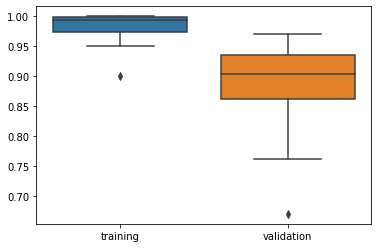

In [ ]:
sns.boxplot(["training"]*cv_folds+["validation"]*cv_folds,training_score_list+validation_score_list)

In [ ]:
pred = [x.flatten() for x in model_final.predict(valid_dataset)]

In [ ]:
pred

[array([9.9989855e-01, 1.0149310e-04], dtype=float32),
 array([9.9990594e-01, 9.3991875e-05], dtype=float32),
 array([9.993636e-01, 6.364630e-04], dtype=float32),
 array([9.9943024e-01, 5.6977756e-04], dtype=float32),
 array([9.999950e-01, 5.059781e-06], dtype=float32),
 array([9.9998581e-01, 1.4129838e-05], dtype=float32),
 array([9.9999690e-01, 3.1496363e-06], dtype=float32),
 array([9.993930e-01, 6.070351e-04], dtype=float32),
 array([9.9999940e-01, 5.8194144e-07], dtype=float32),
 array([9.9995470e-01, 4.5338988e-05], dtype=float32),
 array([0.99216276, 0.00783725], dtype=float32),
 array([9.9936098e-01, 6.3907914e-04], dtype=float32),
 array([9.9987733e-01, 1.2266722e-04], dtype=float32),
 array([9.999813e-01, 1.870936e-05], dtype=float32),
 array([0.9989058 , 0.00109424], dtype=float32),
 array([0.9787636 , 0.02123637], dtype=float32),
 array([9.9930906e-01, 6.9089164e-04], dtype=float32),
 array([9.995154e-01, 4.846285e-04], dtype=float32),
 array([9.9968290e-01, 3.1708227e-04],

In [ ]:
pred_df = pd.DataFrame(pred,columns=["neg","pos"])

In [ ]:
pred_df["active"] = [int(x) for x in valid_dataset.y]
pred_df["SMILES"] = valid_dataset.ids

In [ ]:
pred_df.head()

,neg,pos,active,SMILES
0,0.999899,0.000101,0,Cc1ccc(cc1)c2c3ccccc3c(=O)n(n2)CC(=O)NCc4cc(cc...
1,0.999906,0.000094,0,Cc1ccccc1n2c(=O)c3ccccc3n4c2nnc4S[C@H](C)C(=O)...
2,0.999364,0.000636,0,O=C(O)c1ccc([C@@H]2NCc3ccccc3-n3cccc32)cc1
3,0.999430,0.000570,0,COc1cccc(c1)N2C(=O)[C@@H]3[C@@H](N[C@]4([C@@H]...
4,0.999995,0.000005,0,CC(C)[C@H](C(=O)OCC(=O)NC12CC3CC(C1)CC(C3)C2)N...


In [ ]:
pred_df.sort_values("pos",ascending=False).head(5)

,neg,pos,active,SMILES
94,0.003197,0.996804,1,Oc4ccc(Nc2[nH]nc3ncnc(Nc1cccc(Cl)c1)c23)cc4
38,0.004381,0.995619,1,CN5CCN(Cc4ccc(NC(=O)c3ccc(C)c(C#Cc1cnc2cnccn12...
959,0.004438,0.995562,1,C7CCN(C6CCN(c5ccc4[nH]c(c2n[nH]c3ccc(NCc1nccs1...
734,0.004992,0.995008,1,O=C(Nc3cccc(Nc2nccc(c1cccnc1)n2)c3)c4ccncc4
1044,0.006287,0.993713,1,CP(C)(=O)c5ccc(Nc3ncnc4n(/C=C/c1cccc2[nH]ccc12...


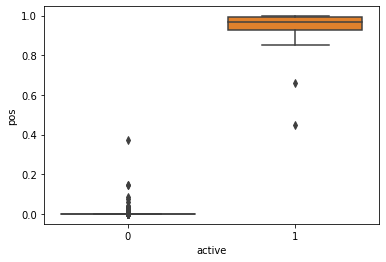

In [ ]:
sns.boxplot(pred_df.active,pred_df.pos)

In [ ]:
import deepchem as dch 
import pandas as pd 
from rdkit.Chem import PandasTools, Draw 
from rdkit import DataStructs 
from rdkit.ML.Cluster import Butina 
from rdkit.Chem import rdMolDescriptors as rdmd 
import seaborn as sns

In [ ]:
featurizer= dch.feat.ConvMolFeaturizer()
# load zinc database in smi format
df= pd.read_csv("zinc100k.smi", sep=" ", header=None)
df.columns=["SMILES", "Name"]
rows, cols= df.shape
df["Val"]= [0]*rows
print(df.head(5))

                                              SMILES              Name  Val
0        CN(CCO)C[C@@H](O)Cn1cnc2c1c(=O)n(C)c(=O)n2C  ZINC000000000843    0
1  O=c1[nH]c(=O)n([C@@H]2C[C@@H](O)[C@H](CO)O2)cc1Br  ZINC000000001063    0
2            Cn1c2ncn(CC(=O)N3CCOCC3)c2c(=O)n(C)c1=O  ZINC000000003942    0
3        CN1C(=O)C[C@H](N2CCN(C(=O)CN3CCCC3)CC2)C1=O  ZINC000000036436    0
4  CC(=O)NC[C@H](O)[C@H]1O[C@H]2OC(C)(C)O[C@H]2[C...  ZINC000000041101    0


In [ ]:
# creating zinc database in csv format
file_name= "zinc_data.csv"
df.to_csv(file_name, index=False)
loader= dch.data.CSVLoader(tasks=["Val"], smiles_field= "SMILES",  featurizer= featurizer)
# 8192 is any randome size
dataset= loader.featurize(file_name, shard_size=8192)

smiles_field is deprecated and will be removed in a future version of DeepChem.Use feature_field instead.


In [ ]:
###As we can see, most of the work is focused on data preparation, prediction of our model takes only 
### one line of code
pred= model_final.predict(dataset)

,SMILES,Name,Val,Neg,Pos,Mol
71760,CN(C)c1nc(NC(=O)c2ccc(-n3cnnn3)cn2)n[nH]1,ZINC000622595378,0,0.169535,0.830464,
54971,O=C(Cn1ccc(NC(=O)c2nc[nH]n2)n1)N1CCOCC1,ZINC000542832769,0,0.226387,0.773613,
68412,O=C(c1ccn2nnnc2c1)N(CCO)CCN1CCOCC1,ZINC000612672635,0,0.326844,0.673156,
47910,Cn1nnnc1CN1CCN(c2cncc3ncnn32)CC1,ZINC000434861486,0,0.330326,0.669674,
55783,O=C(N[C@H](CO)CN1CCOCC1)c1ccc2nnc(O)n2c1,ZINC000551955037,0,0.366199,0.633801,

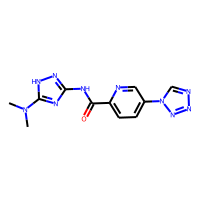
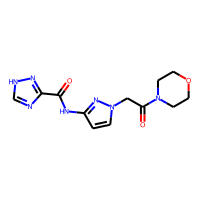
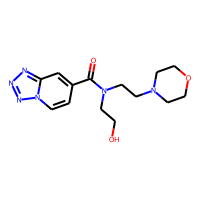
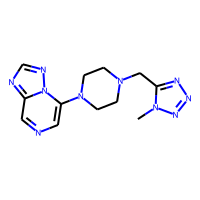
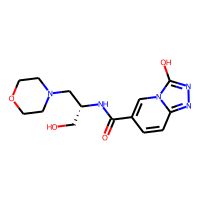

In [ ]:
#Making our prediction a dataframe
prediction_df= pd.DataFrame([x.flatten() for x in pred], columns= ["Neg", "Pos"])
combination_df= df.join(prediction_df, how="outer")
combination_df.sort_values("Pos", inplace= True, ascending= False)
PandasTools.AddMoleculeColumnToFrame(combination_df, "SMILES", "Mol")
combination_df.head(5)

# **Top 10 potential chemical compounds**

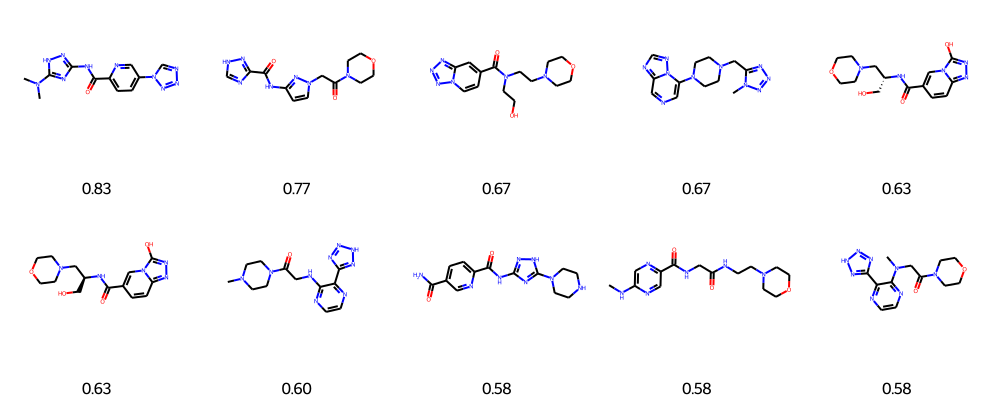

In [ ]:
Draw.MolsToGridImage(combination_df.Mol[:10], molsPerRow=5, legends=["%.2f" % x for x in combination_df.Pos[:10]])